In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [182]:
df.info
#There are 8523 rows and 12 columns

<bound method DataFrame.info of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

In [183]:
df.dtypes
#These are the data types, object and float64

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [184]:
df.duplicated().any()

False

In [185]:
df.isnull().sum()
#Tiem_Weight and Outlet_Size have missing data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [186]:
df['Item_Weight'].head(20)


0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

In [187]:
#Replacing the NaN in Item_Weight with the mean to allow the rest of the data to remain usable, and item weight seems relatively insignificant. Could also delete the column given the high number of NaN.
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), inplace=True)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [188]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [189]:
df['Outlet_Size'].head(20)

0     Medium
1     Medium
2     Medium
3        NaN
4       High
5     Medium
6       High
7     Medium
8        NaN
9        NaN
10    Medium
11     Small
12    Medium
13     Small
14      High
15     Small
16    Medium
17    Medium
18    Medium
19     Small
Name: Outlet_Size, dtype: object

In [190]:
#There are 2410 missing values in Outlet_Size. This column seems to be relatively insiginificant. To retain the date in the rest of the row, the missing values will be replaced with 'Medium' which is the highest response as seen above. 
df['Outlet_Size'].fillna('Medium', inplace = True)
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [191]:
df.isnull().any()
#There are no more missing data

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [192]:
df['Item_Fat_Content'].value_counts()
#Shows inconsistent value names
#Fix LF and low fat to Low Fat 
#Fix reg to Regular 
df.replace({'LF': 'Low Fat'}, inplace = True)
df.replace({'low fat': 'Low Fat'}, inplace = True)
df.replace({'reg': 'Regular'}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [193]:
df['Item_Type'].value_counts()
#Seems consistent

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [194]:
df['Outlet_Size'].value_counts()
#Consistent

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [195]:
df['Outlet_Establishment_Year'].value_counts()
#appears accurate
#Could change this column to age of business and subtract the established year from the present year.

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [196]:
df.describe()
#Here are the summary statistics of the numerical columns:

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f249f25df10>,
      dtype=object)

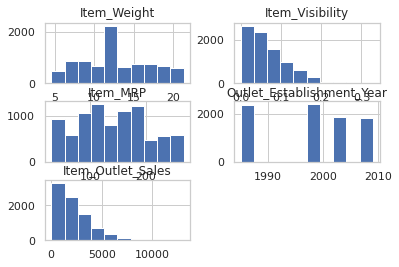

In [197]:
df.hist()

Text(0.5, 0, 'Item Type')

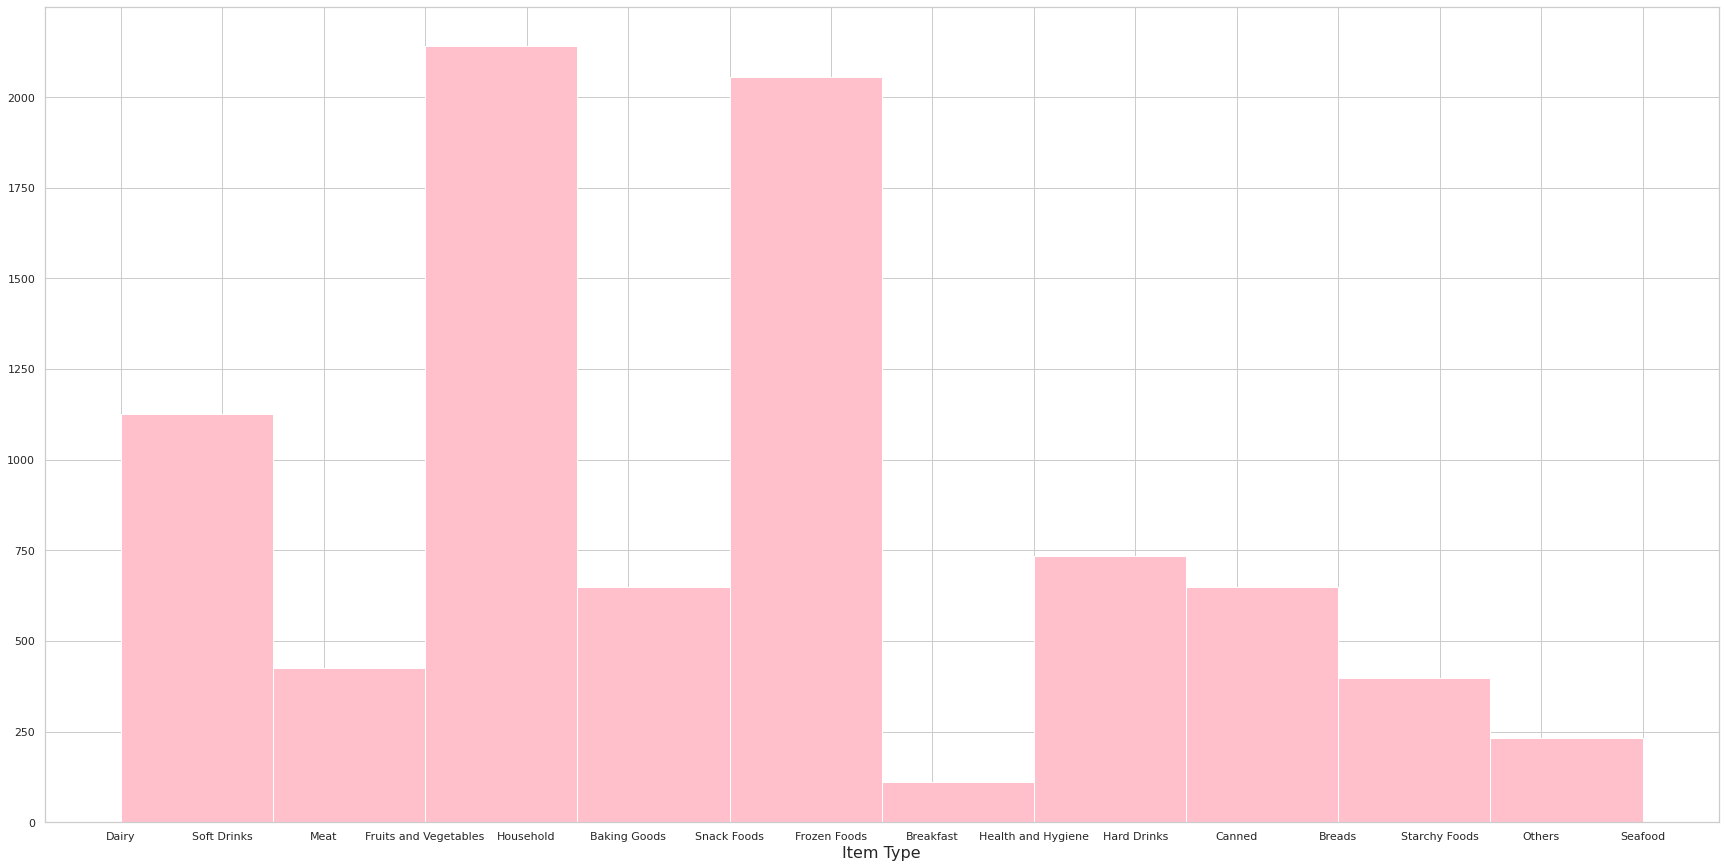

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df['Item_Type'].hist( color = 'pink', figsize=(30,15))
plt.xlabel("Item Type", fontsize = 16)


Text(0.5, 0, 'Item MRP')

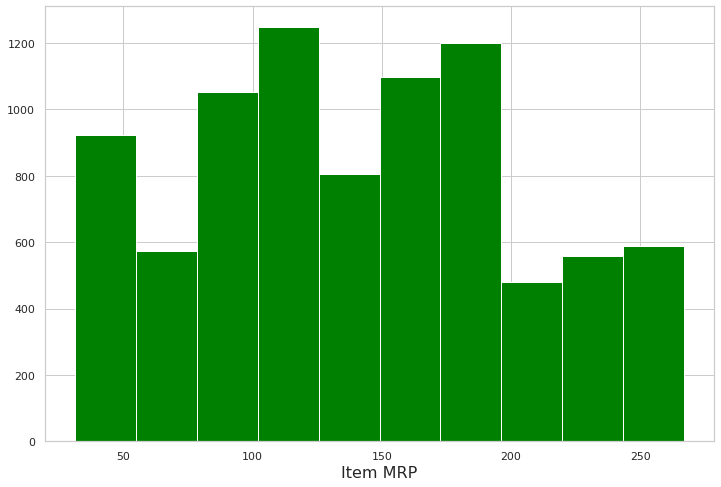

In [199]:
df['Item_MRP'].hist( color = 'green', figsize=(12, 8))
plt.xlabel("Item MRP", fontsize = 16)

Text(0.5, 0, 'Item Visibility')

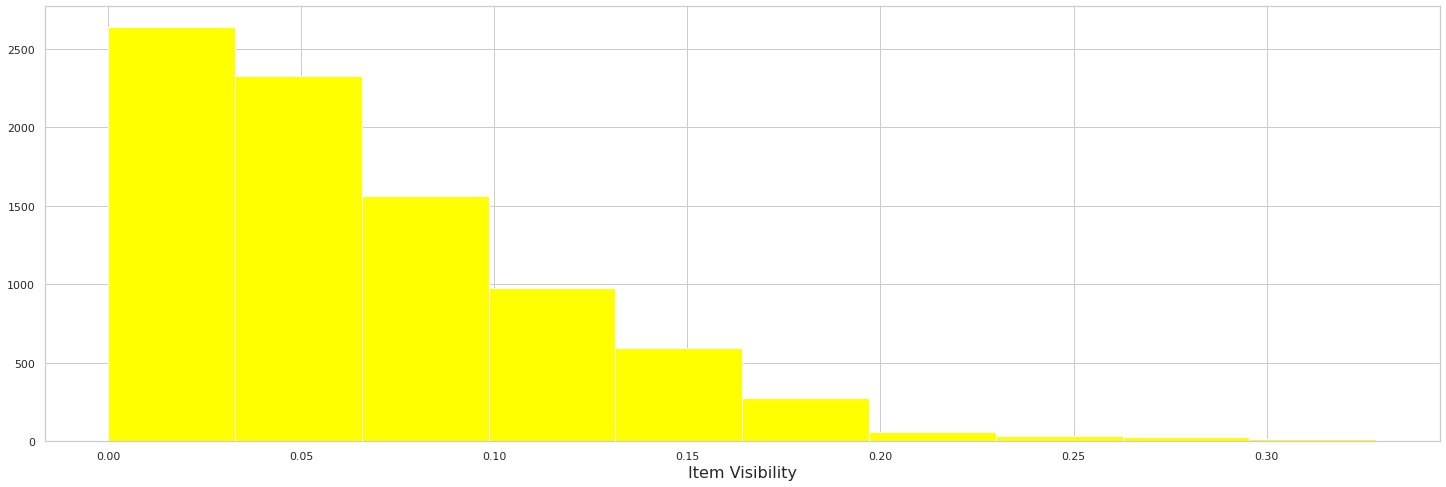

In [200]:
df['Item_Visibility'].hist( color = 'yellow', figsize=(25,8))
plt.xlabel("Item Visibility", fontsize = 16)

Text(0.5, 0, 'Fat Content of Item')

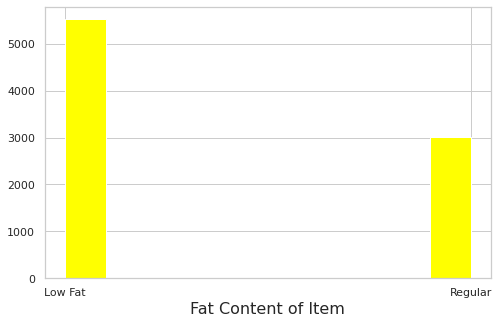

In [201]:
df['Item_Fat_Content'].hist( color = 'yellow', figsize=(8,5))
plt.xlabel("Fat Content of Item", fontsize = 16)

Text(0.5, 0, 'Item Weight')

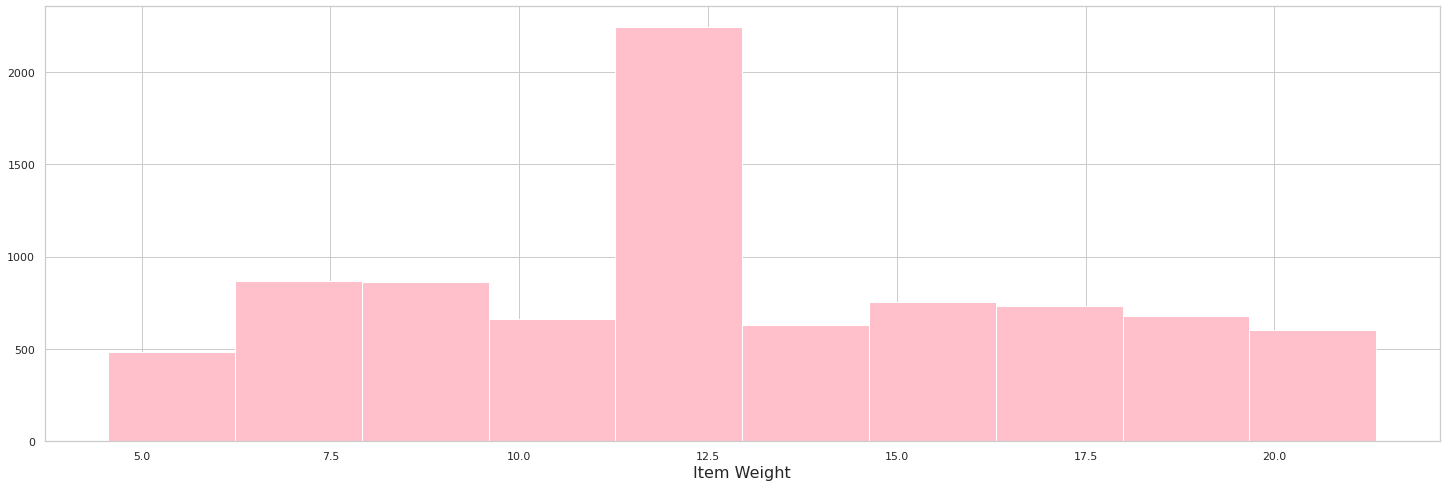

In [202]:
df['Item_Weight'].hist( color = 'pink', figsize=(25,8))
plt.xlabel("Item Weight", fontsize = 16)

Text(0.5, 0, 'Sales')

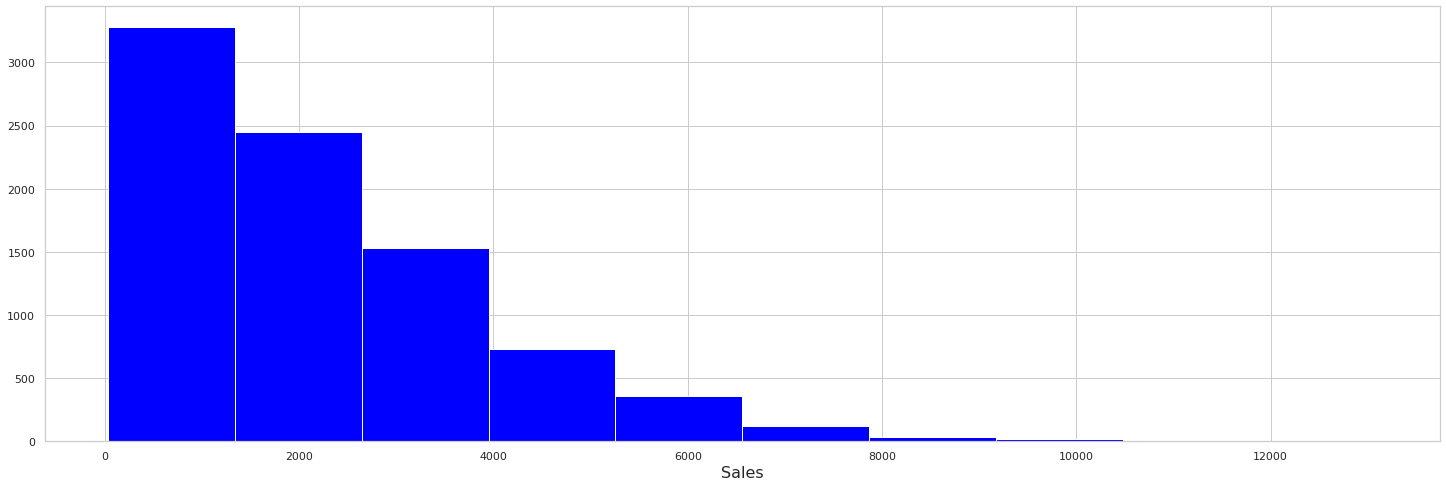

In [203]:
df['Item_Outlet_Sales'].hist( color = 'Blue', figsize=(25,8))
plt.xlabel("Sales", fontsize = 16)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


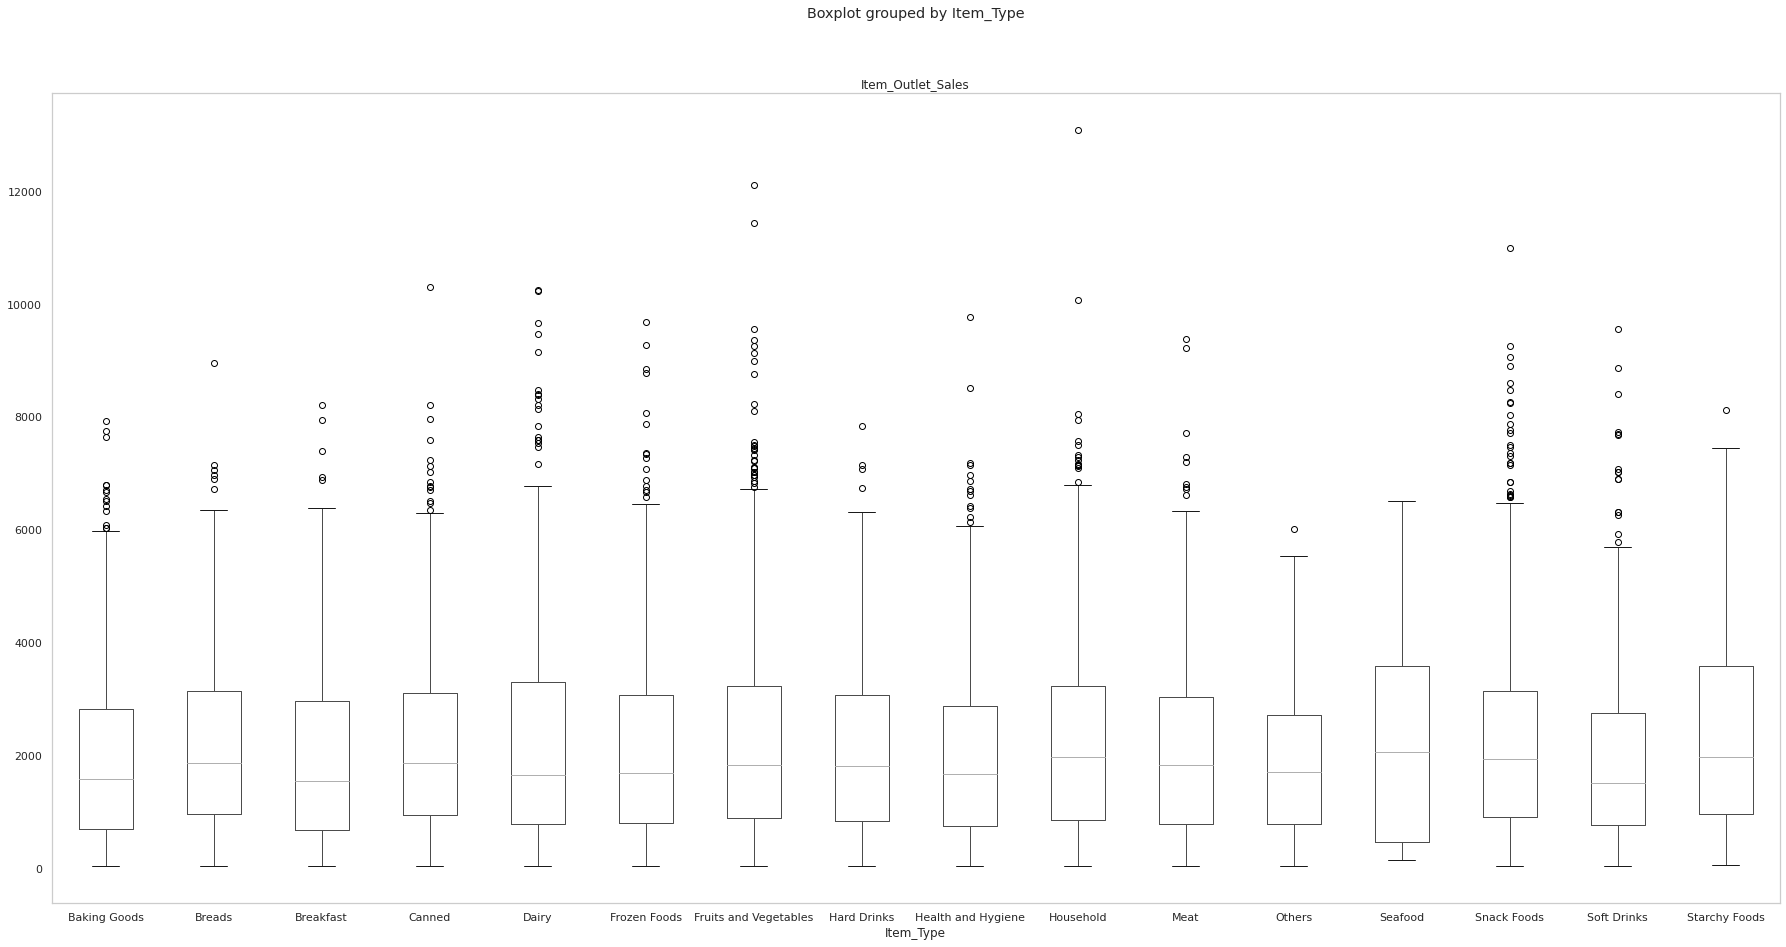

In [204]:
df.boxplot(by ='Item_Type', column =['Item_Outlet_Sales'], grid = False, figsize=(30,15))

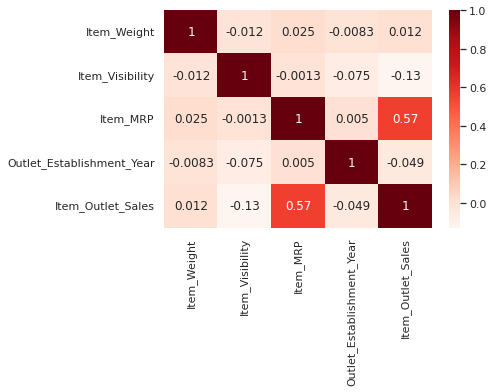

In [205]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)

Text(0.5, 1.0, 'Highest Grossing Items')

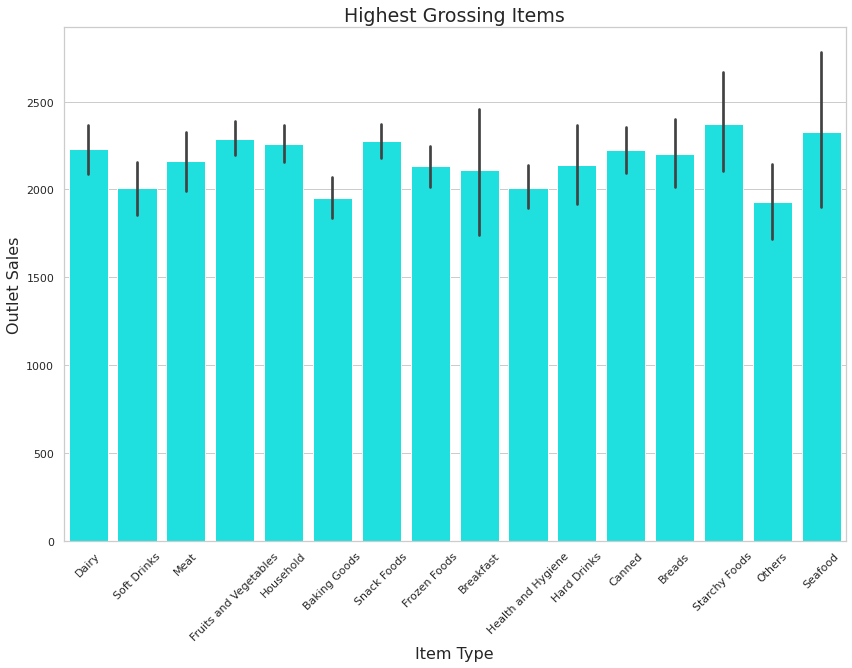

In [217]:

plt.figure(figsize=(12,8))
sns.barplot(x = 'Item_Type',
            y = 'Item_Outlet_Sales',
            data = df, color='aqua')
plt.tight_layout()
plt.xlabel('Item Type', fontsize=16)
plt.ylabel('Outlet Sales', fontsize=16)
plt.xticks(rotation=45)
plt.title('Highest Grossing Items', fontsize=19)

#Sales Data showing highest grossing products


Text(0.5, 1.0, 'Sales compared with Item Visibility')

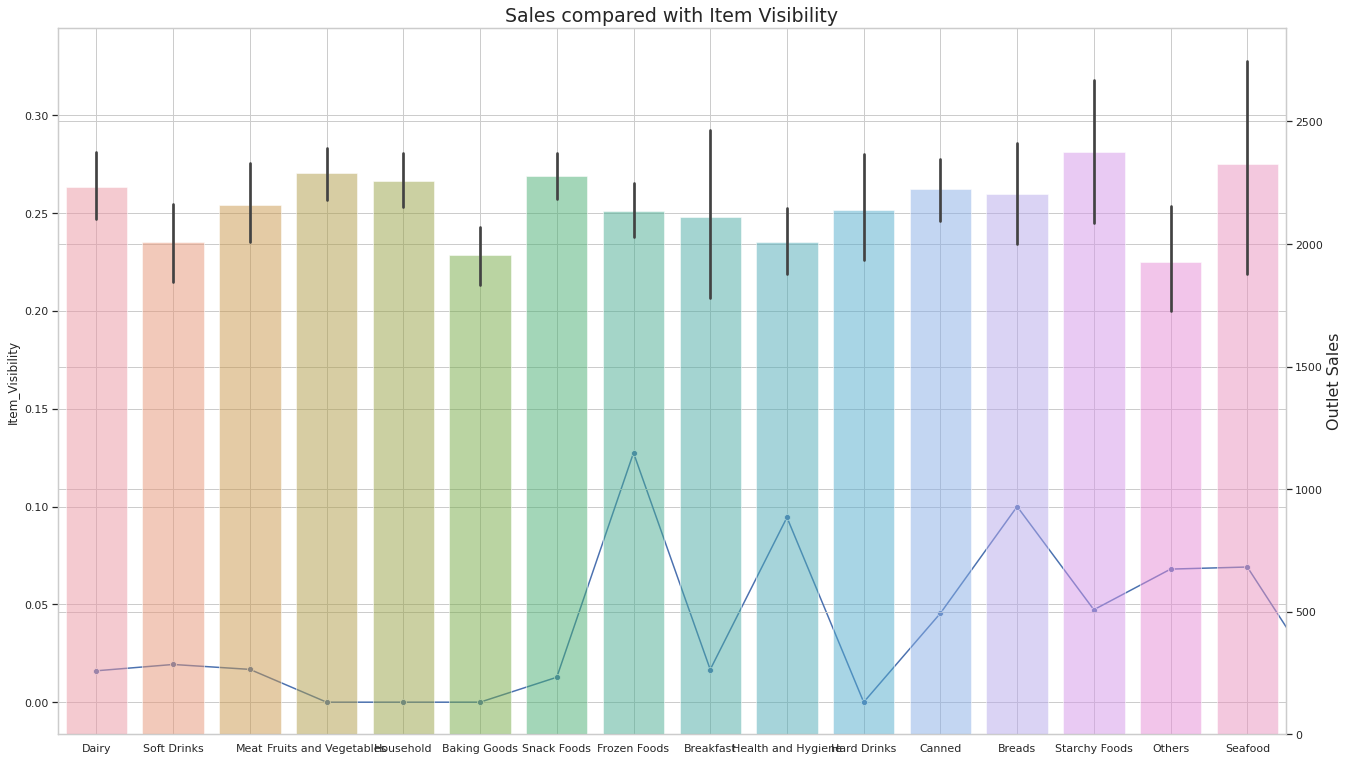

In [238]:
# Show Correlation of Sales with Item visibility
ax1 = sns.set_style(style = None, rc = None)

fig, ax1 = plt.subplots(figsize = (22, 13))

sns.lineplot(data = df['Item_Visibility'], marker = 'o', sort = True, ax = ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales', alpha = 0.5, ax = ax2)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Item Type', fontsize=16)
plt.ylabel('Outlet Sales', fontsize=16)
plt.title('Sales compared with Item Visibility', fontsize=19)



